[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ms5eQQcocQYQFJhG-P6ohZ-Xkm-SqmI3?usp=sharing)

# HW4 - Directions & Weights
### Mac Ambler
### DATA 340-02, Spring 2023
### 04/06/2023

# Q1

*Draw the #RepealThe19th retweet network. Ensure the graph is legible and pretty:*

* *Edge crossings are minimized*

## Answer

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

import gzip
import json

In [10]:
# initialize directed network
D = nx.DiGraph()

with gzip.open('/content/drive/MyDrive/Network Science/HW4/repealthe19th.jsonl.gz', 'rb') as infile:
    for tweet in infile:
        tweet = json.loads(tweet)
        # adding edge to the graph
        if 'retweeted_status_user_id_str' in tweet.keys():
          if D.has_edge(tweet['retweeted_status'].get('user_screen_name'), tweet['user_screen_name']):
              D.edges[tweet['retweeted_status'].get('user_screen_name'), tweet['user_screen_name']]['weight'] += 1
          else:
              D.add_edge(tweet['retweeted_status'].get('user_screen_name'), tweet['user_screen_name'], weight=1)

D.remove_edges_from(nx.selfloop_edges(D))

In [15]:
nx.write_gexf(D, '/content/drive/MyDrive/Network Science/HW4/RepealThe19th_retweet.gexf')

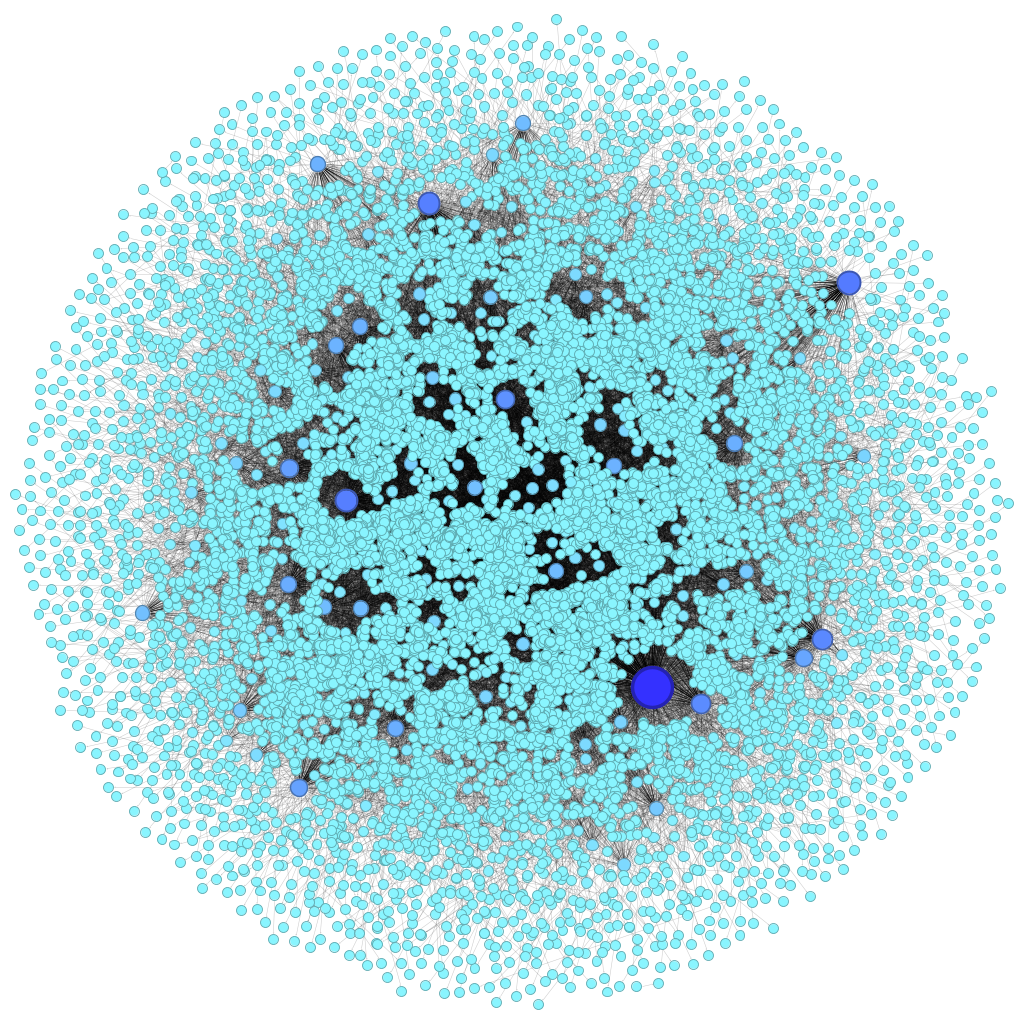

In [4]:
from IPython.display import Image
Image('/content/drive/MyDrive/Network Science/HW4/RepealThe19th_network.png')

## Discussion

In order to load in the #RepealThe19th retweet network, I first imported the necessary packages and initialized an empty networkx directed network. Next, I opened the gzipped json file and used the json.load() function to load each tweet in the file. For each tweet, I then checked if it had the key "retweeted_status_user_id_str", as this key only existed if the tweet was a retweet. Once I determined if the tweet was a retweet, I checked if an edge already existed between the two users, and if so the value one was added to the weight of the edge. Otherwise, a new edge was created. Finally, I removed all self-loops from the network.

Next, to visualize the network, I wrote the network to a .gexf file and imported it to Gephi. Once in Gephi, I changed the color and size of the nodes, weighting them by out-strength. I then used a combination of the Force Atlas and Expansion layouts to create the most legible graph I could while minimizing edge crossings. Finally, I changed the edges in the preview tab so they were at 20% opacity and were straight, black lines. The displayed image is the resulting network visualization.

# Q2

* *How many nodes are in the retweet network?*
* *How many links are in the retweet network?*
* *What is the screen name of the node with highest out-strength in the network? What is its out-strength?*
* *What is the screen name of the node with the second-highest out-strength in the network?*
* *What is the screen name of the node with highest in-strength in the network? What is its in-strength?*
* *Describe what the out-strength and in-strength values of these accounts tell you about their online behavior.*


## Answer

In [11]:
print('The retweet network has', D.number_of_nodes(), 'nodes.')

The retweet network has 14874 nodes.


In [12]:
print('The retweet network has', D.number_of_edges(), 'links.')

The retweet network has 14795 links.


In [13]:
out_strength = D.out_degree(D.nodes(), weight='weight')
out_strength = sorted(out_strength, key = lambda x: x[1], reverse=True)
print('The node with the highest out strength is', out_strength[0][0], 'with an out strength of', out_strength[0][1])

The node with the highest out strength is Samandjunk with an out strength of 901


In [14]:
print('The node with the second highest out strength is', out_strength[1][0], 'with an out strength of', out_strength[1][1])

The node with the second highest out strength is m_kaish_esq with an out strength of 394


In [15]:
in_strength = D.in_degree(D.nodes(), weight='weight')
in_strength = sorted(in_strength, key = lambda x: x[1], reverse=True)
print('The node with the highest in strength is', in_strength[0][0], 'with an in strength of', in_strength[0][1])

The node with the highest in strength is JenTromans with an in strength of 48


The fact that "Samandjunk" has an out-strength over 500 greater than that of the next highest account indicates their tweets related to #RepealThe19th are disproportionately retweeted more than any other accounts. The user "JenTromans" has the highest in-strength at 48, indicating they retweet posts pertaining to #RepealThe19th more than any other accounts.

## Discussion

* I utilized the networkx function "number_of_nodes()" to print the number of nodes in the retweet network.

* I utilized the networkx function "number_of_edges()" to print the number of links in the retweet network.

* To determine the node with the highest out strength, I first used the "out_degree()" function to get the out strength of all the nodes in the retweet network. Then, I sorted this list using a lambda function so that it was in descending order. Finally, I indexed and printed the screen name and out strength of the first node in the list.

* To determine the node with the second-highest out strength, I used the same sorted list from the previous question, indexing and printing the screen name and out strength for the second element.

* To determine the node with the highest in strength, I first used the "in_degree()" function to get the in strength of all the nodes in the retweet network. Then, I sorted this list using a lambda function so that it was in descending order. Finally, I indexed and printed the screen name and in strength of the first node in the list.

# References
* Mac Ambler Homework 3 - Hubs, <https://github.com/mmambler/DATA-340-Network-Sciences-Repo/blob/main/hw3/hw3_report.ipynb>
* Homework 4 - Directions and Weights, <https://github.com/anwala/teaching-network-science/tree/main/spring-2023/homework/hw4>
* data_340_02_s23_chp_04_directions_and_weights.ipynb, <https://github.com/anwala/teaching-network-science/blob/main/spring-2023/week-8/data_340_02_s23_chp_04_directions_and_weights.ipynb>
* Removing self-loops from undirected networkx graph, <https://stackoverflow.com/questions/49427638/removing-self-loops-from-undirected-networkx-graph>